Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root = r"C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration"
data_dir_train = pathlib.Path(root + r"\Train")
data_dir_test = pathlib.Path(root + r"\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Images from Train Data Sets


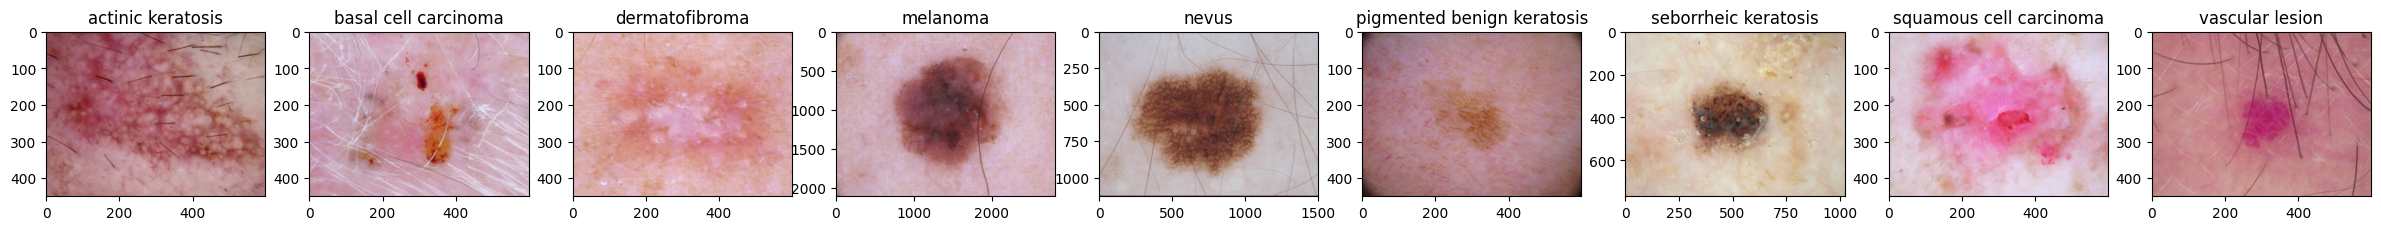

Images from Test Data Sets


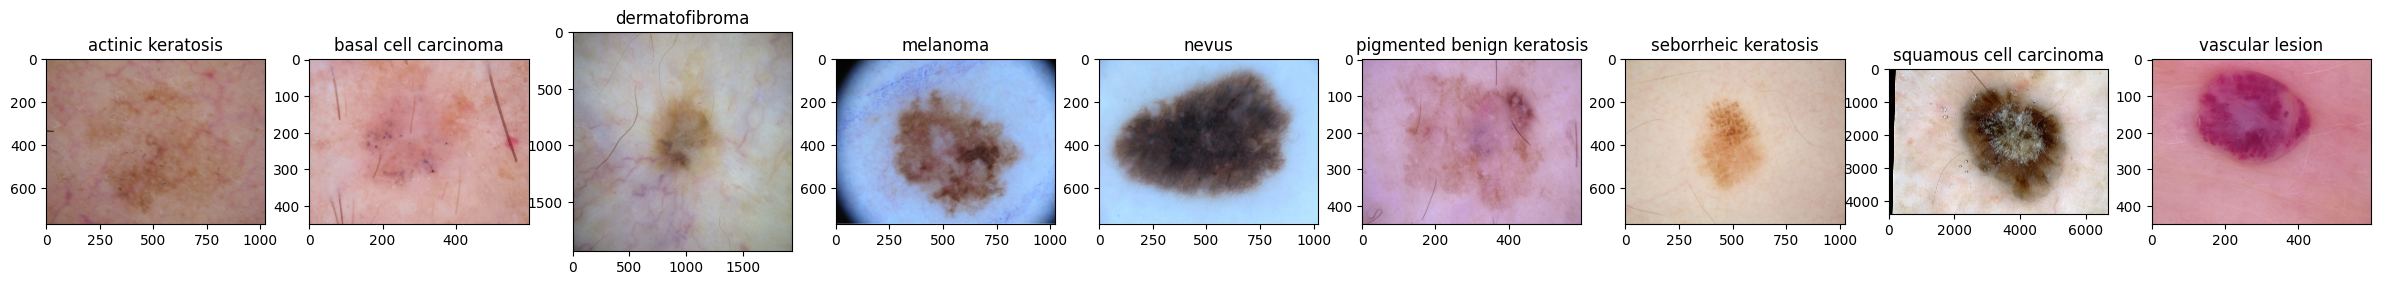

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

### your code goes here, you can use training or validation data to visualize
def display_image(path):
  i=0
  fig, axs = plt.subplots(1, 9, figsize=(30, 10))  # 1 row, 2 columns
  for _p in list(path.glob("*/")):
    files = list(_p.iterdir())
    if not files:
      continue

    axs[i].imshow(Image.open(files[0]))
    axs[i].set_title(files[0].parent.name)
    i=i+1

  plt.show()

print("Images from Train Data Sets")
display_image(data_dir_train)
print("Images from Test Data Sets")
display_image(data_dir_test)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
from tensorflow.keras.layers import Rescaling,Conv2D,MaxPool2D,Dense,Flatten

input_shape = (180,180,3)

model = Sequential([
    Rescaling(1/255, input_shape=input_shape),
    Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(9,activation='softmax')
])

c:\Users\manoj.shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\manoj.shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [26]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [28]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 343ms/step - accuracy: 0.2348 - loss: 2.1138 - val_accuracy: 0.4698 - val_loss: 1.5942
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 432ms/step - accuracy: 0.4542 - loss: 1.5896 - val_accuracy: 0.5190 - val_loss: 1.4685
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 486ms/step - accuracy: 0.4915 - loss: 1.4432 - val_accuracy: 0.5123 - val_loss: 1.4253
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 436ms/step - accuracy: 0.5359 - loss: 1.3274 - val_accuracy: 0.5168 - val_loss: 1.4804
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.5319 - loss: 1.3422 - val_accuracy: 0.5235 - val_loss: 1.4279
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 490ms/step - accuracy: 0.5747 - loss: 1.2156 - val_accuracy: 0.5190 - val_loss: 1.4216
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 486ms/step - accuracy: 0.6087 - loss: 1.0996 - val_accuracy: 0.5190 - val_loss: 1.5014
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.6070 - loss: 1.0821 - val_accu

### Visualizing training results

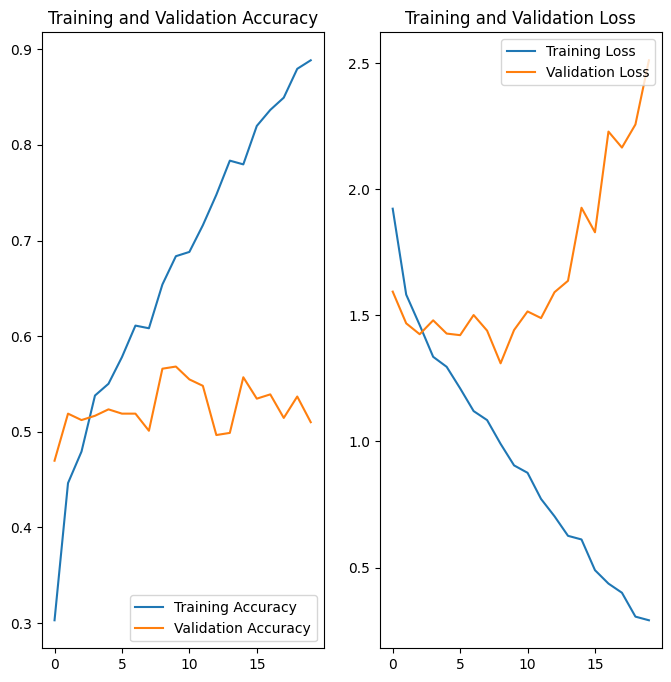

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

We can clearly see that with every epoch accuracy in training is increasing whereas in validation, there is no such case. If we talk about loss of training, its continuously decreasing but for validation, loss is increasing. This is clear sign of overfitting

# Todo, visualize how your augmentation strategy works for one instance of training image.
In Augmentation, an image is rotated, flipped, zoomed or shifted

### Todo:
### Create the model, compile and train the model


In [11]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
from tensorflow.keras.layers import Rescaling,Conv2D,MaxPool2D,Dense,Flatten,RandomFlip,RandomRotation,RandomZoom,RandomContrast,Dropout

input_shape = (180,180,3)

model = Sequential([
    Rescaling(1/255, input_shape=input_shape),
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),

    Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(9,activation='softmax')
])


### Compiling the model

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [13]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 92s 515ms/step - accuracy: 0.1437 - loss: 2.6875 - val_accuracy: 0.2264 - val_loss: 2.0712
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 100s 590ms/step - accuracy: 0.2499 - loss: 1.9484 - val_accuracy: 0.3846 - val_loss: 1.6918
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 97s 575ms/step - accuracy: 0.3536 - loss: 1.6901 - val_accuracy: 0.3994 - val_loss: 1.6518
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 102s 602ms/step - accuracy: 0.3832 - loss: 1.6200 - val_accuracy: 0.3942 - val_loss: 1.6135
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 111s 660ms/step - accuracy: 0.3840 - loss: 1.6264 - val_accuracy: 0.4083 - val_loss: 1.5009
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 122s 722ms/step - accuracy: 0.3976 - loss: 1.5915 - val_accuracy: 0.4336 - val_loss: 1.4666
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 749ms/step - accuracy: 0.4124 - loss: 1.5357 - val_accuracy: 0.4477 - val_loss: 1.4143
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 699ms/step - accuracy: 0.4288 - l

### Visualizing the results

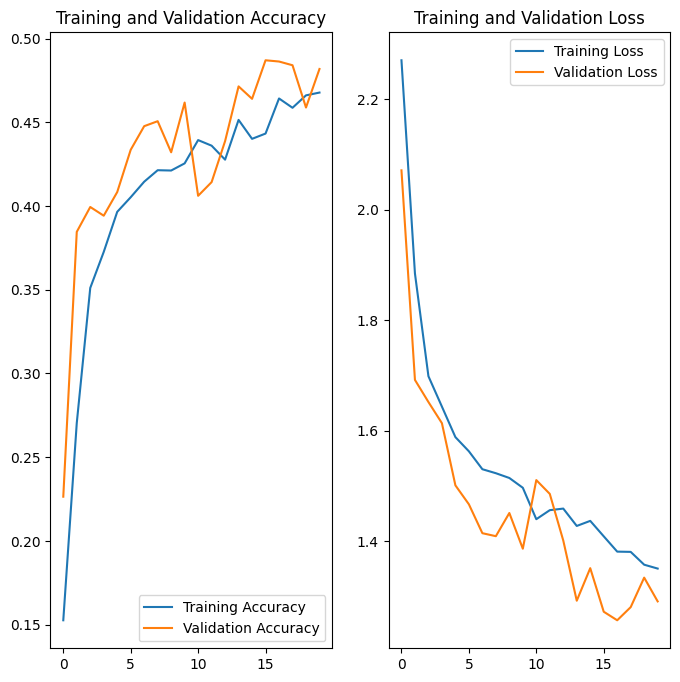

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After adding augmentation strategy and dropout, the model now is not overfitting, There has been improvement as compared to previous model run. There is minimum different between the training and validation, In every epoc, the model is getting better and better and loss is being decreased.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

[['actinic keratosis', 115], ['basal cell carcinoma', 377], ['dermatofibroma', 96], ['melanoma', 439], ['nevus', 358], ['pigmented benign keratosis', 463], ['seborrheic keratosis', 78], ['squamous cell carcinoma', 182], ['vascular lesion', 140]]


<Axes: xlabel='Class'>

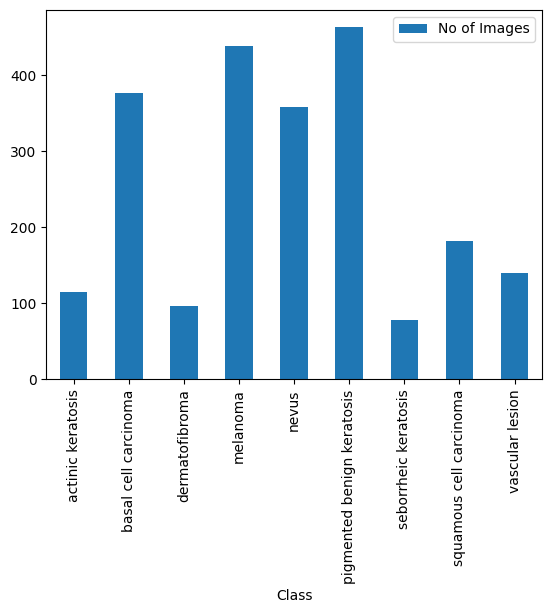

In [15]:

class_list = []
for _p in list(data_dir_train.glob("*/")):
    files = list(_p.iterdir())
    if not files:
      continue
    class_list.append([files[0].parent.name,len(files)])
print(class_list)
pd.DataFrame(class_list,columns=["Class","No of Images"]).set_index("Class").plot.bar()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis(77) has the lest number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis class dominate (462) the data in terms of proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [17]:
path_to_training_dataset=r"C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F4CE3B2030>: 100%|██████████| 500/500 [00:02<00:00, 243.78 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F4CE2F3F80>: 100%|██████████| 500/500 [00:02<00:00, 244.51 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F4CE34EF60>: 100%|██████████| 500/500 [00:02<00:00, 246.10 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F4CE6EB4D0>: 100%|██████████| 500/500 [00:08<00:00, 61.57 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1F4CE6E9F10>: 100%|██████████| 500/500 [00:09<00:00, 51.51 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F4CE28C920>: 100%|██████████| 500/500 [00:02<00:00, 218.56 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F4CC6F70E0>: 100%|██████████| 500/500 [00:04<00:00, 100.64 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F4CE2B7CE0>: 100%|██████████| 500/500 [00:02<00:00, 194.23 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F4CE4188C0>: 100%|██████████| 500/500 [00:02<00:00, 204.30 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [18]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [10]:
from glob import glob

In [11]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\manoj.shah\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_32bab8ef-d417-449b-9200-196c88c58521.jpg',
 'C:\\Users\\manoj.shah\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5c705885-32a4-43e8-8a5c-2476a52b3545.jpg',
 'C:\\Users\\manoj.shah\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5cad8bda-9db3-4a98-8767-48c9bd0a8399.jpg',
 'C:\\Users\\manoj.shah\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e35fa88c-54fe-4085-9041-de80e6f1682c.jpg',
 'C:\\Users\\manoj.shah\\Downloads\\CNN_assignment\\Skin

In [12]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [13]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [14]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [15]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [16]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [17]:
data_dir_train=r"C:\Users\manoj.shah\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
from tensorflow.keras.layers import Rescaling,Conv2D,MaxPool2D,Dense,Flatten,RandomFlip,RandomRotation,RandomZoom,RandomContrast,Dropout,BatchNormalization,MaxPooling2D

input_shape = (180,180,3)

model = Sequential([
    Rescaling(1/255, input_shape=input_shape),
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),

    Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'),
    
    BatchNormalization(),
    Dropout(0.5),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(9,activation='softmax')
])


c:\Users\manoj.shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\manoj.shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [22]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [23]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 161s 929ms/step - accuracy: 0.2398 - loss: 2.3384 - val_accuracy: 0.1151 - val_loss: 3.6732
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 861ms/step - accuracy: 0.3825 - loss: 1.7121 - val_accuracy: 0.1648 - val_loss: 2.8475
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 157s 927ms/step - accuracy: 0.4075 - loss: 1.6042 - val_accuracy: 0.2079 - val_loss: 2.3781
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.4337 - loss: 1.5100 - val_accuracy: 0.2673 - val_loss: 2.1735
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.4296 - loss: 1.4848 - val_accuracy: 0.2339 - val_loss: 2.1085
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.4469 - loss: 1.4380 - val_accuracy: 0.4001 - val_loss: 1.6702
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.4548 - loss: 1.4340 - val_accuracy: 0.4202 - val_loss: 1.5256
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 163s 963ms/step - accuracy: 0.4573 - loss: 1.414

#### **Todo:**  Visualize the model results

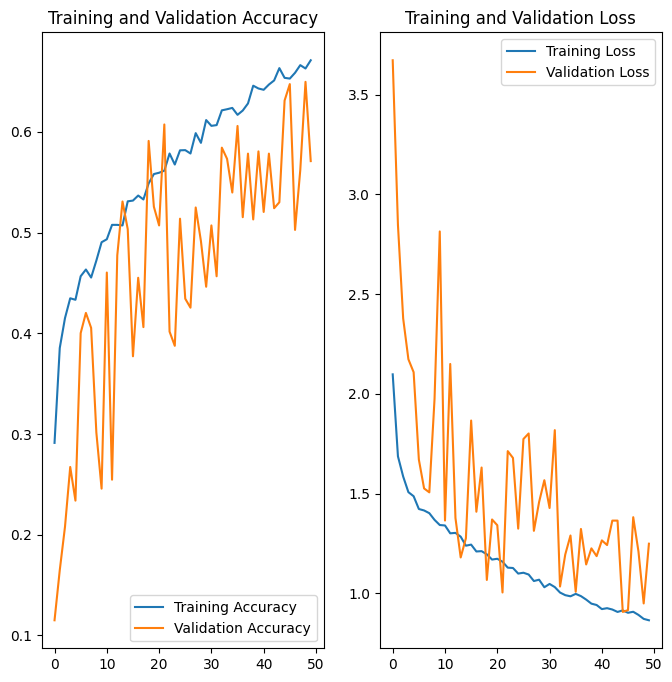

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After doing class imbalance, I can see improvement on training score but validation is still low as compared to training. Its is small overfitting the data but the training score has improved as compared to earlier.